# EDA

## Import libraries and datasets

In [27]:
# Import libraries
import pandas as pd # For placing the data into dataframes for analysis
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import plotly.express as px
from scipy.stats import spearmanr

# creating plots using seaborn setting 
# sns.set()

# using jupyter magic to display plots in line
%matplotlib inline

pd.set_option('display.max_columns', 160)
pd.set_option('display.max_rows', 400)

In [2]:
# Import training dataset
train = pd.read_csv('../datasets/train_1.csv')

In [3]:
train.head()

,id,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog,application_type,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,year,total_inc_consol,total_dti_consol,sub_grade_d,est_age_cr_line,fico_median,region
0,68407277,3600.0,36.0,13.99,123.03,3,10.0,MORTGAGE,Not Verified,2015-12,1,n,debt_consolidation,PA,0.0,1.0,30.0,0.0,7.0,0.0,2765.0,29.7,13.0,30.0,Individual,3.0,1.0,4.0,4.0,1506.0,37.2,148.0,128.0,3.0,3.0,1.0,4.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,Cash,2015,55000.0,5.91,34,148,677.0,northeast
1,68355089,24700.0,36.0,11.99,820.28,3,10.0,MORTGAGE,Not Verified,2015-12,1,n,small_business,SD,1.0,4.0,6.0,0.0,22.0,0.0,21470.0,19.2,38.0,1.0,Individual,0.0,0.0,6.0,4.0,57830.0,27.1,113.0,192.0,2.0,2.0,4.0,2.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,Cash,2015,65000.0,16.06,31,192,717.0,midwest
2,68341763,20000.0,60.0,10.78,432.66,2,10.0,MORTGAGE,Not Verified,2015-12,1,n,home_improvement,IL,0.0,0.0,0.0,0.0,6.0,0.0,7869.0,56.2,18.0,0.0,Joint App,2.0,5.0,1.0,6.0,2737.0,55.9,125.0,184.0,14.0,14.0,5.0,101.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,Cash,2015,134000.0,24.63,24,184,697.0,midwest
3,68476807,10400.0,60.0,22.45,289.91,6,3.0,MORTGAGE,Source Verified,2015-12,1,n,major_purchase,PA,1.0,3.0,12.0,0.0,12.0,0.0,21929.0,64.5,35.0,1.0,Individual,2.0,1.0,3.0,10.0,4567.0,77.5,128.0,210.0,4.0,4.0,6.0,4.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,Cash,2015,104433.0,25.37,61,210,697.0,northeast
4,68426831,11950.0,36.0,13.44,405.18,3,4.0,RENT,Source Verified,2015-12,1,n,debt_consolidation,GA,0.0,0.0,0.0,0.0,5.0,0.0,8822.0,68.4,6.0,0.0,Individual,0.0,0.0,0.0,0.0,844.0,91.0,338.0,54.0,32.0,32.0,0.0,36.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,Cash,2015,34000.0,10.20,33,338,692.0,south


In [4]:
train.shape

(901852, 62)

In [5]:
train.dtypes

id                               int64
loan_amnt                      float64
term                           float64
int_rate                       float64
installment                    float64
grade                            int64
emp_length                     float64
home_ownership                  object
verification_status             object
issue_d                         object
loan_status                      int64
pymnt_plan                      object
purpose                         object
addr_state                      object
delinq_2yrs                    float64
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                       float64
pub_rec                        float64
revol_bal                      float64
revol_util                     float64
total_acc                      float64
mths_since_last_major_derog    float64
application_type                object
inq_fi                   

In [6]:
# Get list of columns with object datatype
object_col = train.select_dtypes('object').columns
object_col

Index(['home_ownership', 'verification_status', 'issue_d', 'pymnt_plan',
       'purpose', 'addr_state', 'application_type', 'disbursement_method',
       'region'],
      dtype='object')

## Hypothesis Testing

### Fico Scoring

(660.0, 760.0)

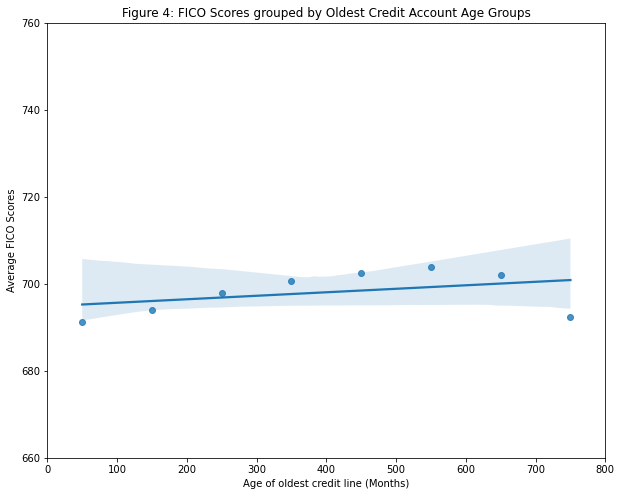

In [7]:
# creating empty list for bins and specifying bin widths
bin_edges = list()
bin_width = 100

# filling in list of bin widths
for num in range(int(round((800/bin_width)+1))):
    bin_edges.append((num)*bin_width)

# creating a counter for the number of age groups
age_group_counter = 0

# creating a place holder for credit age groups (CAG)
CAG_charged_off = pd.DataFrame()
CAG_fully_paid = pd.DataFrame()
CAG_all_borrowers = pd.DataFrame()

# creating a for loop to group borrowers by age group
for index, age in enumerate(bin_edges):   
    
    # checking if all age groups are created
    if age_group_counter == len(bin_edges) - 1:
        break
    
    # creating credit age groups 
    else:
        age_group = train[(train['est_age_cr_line'] >= bin_edges[index]) &
                              (train['est_age_cr_line'] < bin_edges[index+1])]
        age_group_counter +=1
        column_name = str(bin_edges[index]) + "-" + str(bin_edges[index+1])
        
        # credit age group for charged_off borrowers
        CAG_all_borrowers[column_name] = age_group.mean()
        
        # credit age group for charged_off borrowers
        CAG_charged_off[column_name] = age_group[age_group.loan_status == 0].mean()

        # credit age group for fully paid borrowers
        CAG_fully_paid[column_name] = age_group[age_group.loan_status == 1].mean()
        
# calculating fico average scores for various age groups
prop_C = CAG_charged_off.loc['fico_median']
prop_fully_paid = CAG_fully_paid.loc['fico_median']
prop_all = CAG_all_borrowers.loc['fico_median']

# Making histogram
fig, ax1 = plt.subplots(figsize = (10,8))

sns.regplot(x = np.arange(50, 850, bin_width), y = prop_all)


plt.title('Figure 4: FICO Scores grouped by Oldest Credit Account Age Groups')
plt.xlim([0,800])
plt.xlabel("Age of oldest credit line (Months)")
plt.ylabel("Average FICO Scores")
plt.ylim([660,760])

### Grade-subgrade
To see if grading assigned has relation to the probablity of defaulting

In [8]:
# Create value counts table
def var_value_count(label):
    table = train.value_counts([label, 'loan_status'])
    return table

In [9]:
# Create loan_stat_grade table
loan_stat_grade_t = var_value_count('grade')

In [10]:
# To plot graphs of variable vs loan status
def loan_stat_var(data, xlabel):
    data.unstack().plot(kind='bar', figsize = (12, 10)  #plot a grouped bar chart 
                         , title='Loan Status Frequency per ' + xlabel);
    data.unstack().plot(kind='bar', stacked=True, figsize = (10, 8)  #plot a stacked grouped bar chart 
                         , title='Loan Status Frequency per ' + xlabel + ' (stacked)');

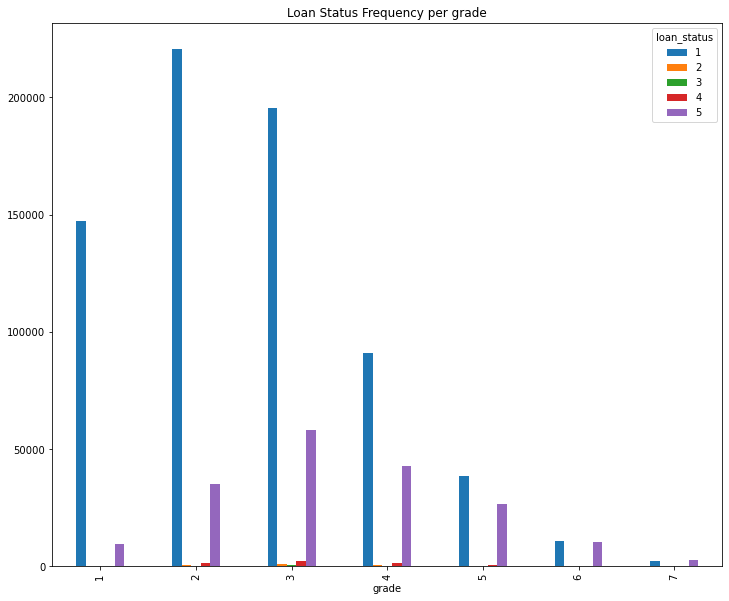

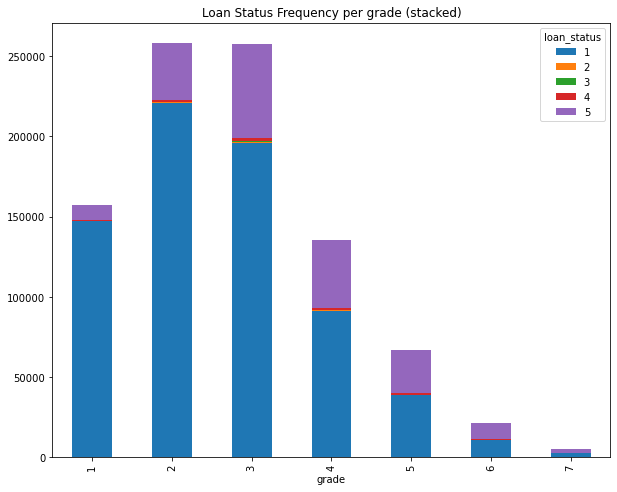

In [11]:
loan_stat_var(loan_stat_grade_t, 'grade')

In [28]:
# Create function to create data frame
def create_df_table(table, df_name, sort_feature):
    df_name = pd.DataFrame(table)
    df_name.reset_index(inplace=True)
    df_name.rename(columns = {0: 'count'}, inplace = True)
    df_name.sort_values(by = [sort_feature, 'loan_status'], inplace = True)
    df_name.reset_index(drop = True, inplace=True)
    return df_name

Can an investor truly measure his risk based on the grade of the loan?

In [12]:
grade_ls = train[((train['loan_status'] == 1) | (train['loan_status'] == 5))]

In [13]:
# Run Mann-Whitney U test
stat, p = st.mannwhitneyu(grade_ls['loan_status'], grade_ls['grade'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=209593522598.000, p=0.000


### Purpose

In [14]:
purpose_t = var_value_count('purpose')

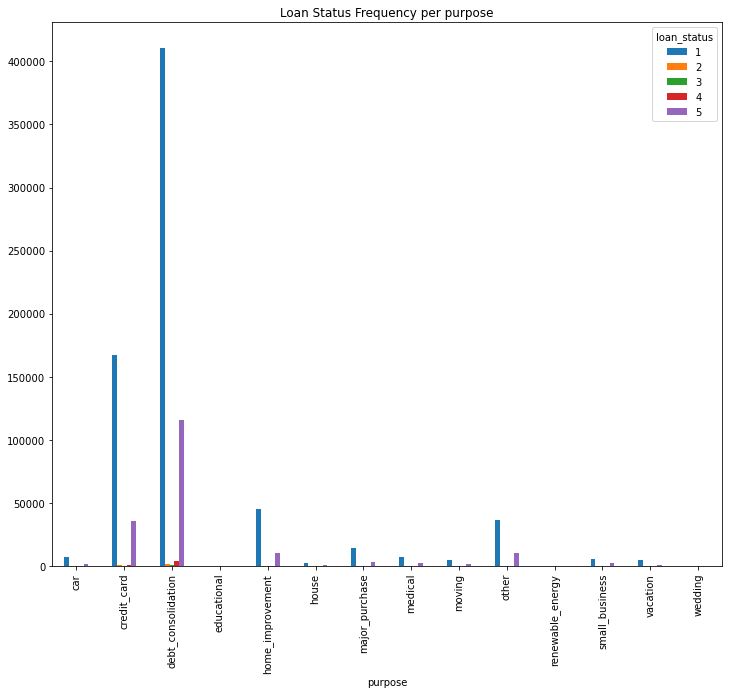

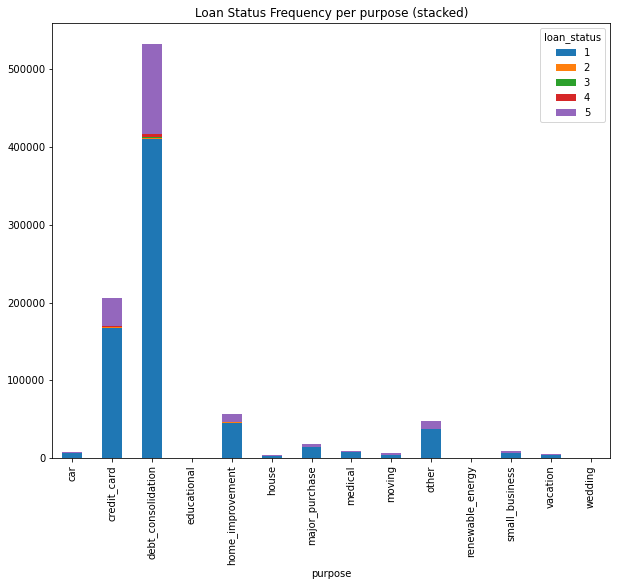

In [15]:
loan_stat_var(purpose_t, 'purpose')

In [ ]:
purpose_df = create_df_table(purpose_t, 'purpose_df', 'purpose')

In [ ]:
purpose_default = purpose_df[((purpose_df['loan_status'] == 1) | (purpose_df['loan_status'] == 5))]
pp_table = pd.pivot_table(data = purpose_default, values = 'count', index = 'loan_status', columns = 'purpose')
pp_table

In [ ]:
pp_table.fillna(0, inplace=True)

In [ ]:
stat, p, dof, expected = st.chi2_contingency(pp_table)
# st.chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = st.chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')


### Delinq 6 mths

In [16]:
train.delinq_2yrs.describe()

count    901852.000000
mean          0.347584
std           0.925137
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          39.000000
Name: delinq_2yrs, dtype: float64

In [18]:
train.delinq_2yrs.unique()

array([ 0.,  1.,  2.,  3.,  4.,  6.,  5., 15.,  7.,  9., 10.,  8., 11.,
       13., 14., 12., 30., 18., 16., 17., 26., 20., 19., 22., 27., 39.,
       21., 29.])

In [19]:
# 
delinq = var_value_count('delinq_2yrs')

In [20]:
delinq_t = pd.DataFrame(delinq)
delinq_t.reset_index(inplace=True)
delinq_t.rename(columns = {0: 'count'}, inplace = True)
delinq_t.sort_values(by = ['delinq_2yrs', 'loan_status'], inplace = True)
delinq_t.reset_index(drop = True, inplace=True)

In [21]:
delinq_t

,delinq_2yrs,loan_status,count
0,0.0,1,562648
1,0.0,2,1978
2,0.0,3,923
3,0.0,4,4780
4,0.0,5,144833
5,1.0,1,94952
6,1.0,2,370
7,1.0,3,194
8,1.0,4,947
9,1.0,5,25687


In [22]:
delinq_1_5 = delinq_t[((delinq_t['loan_status'] == 1) | (delinq_t['loan_status'] == 5))]
# delinq_5 = delinq_t[(delinq_t['loan_status'] == 5)]

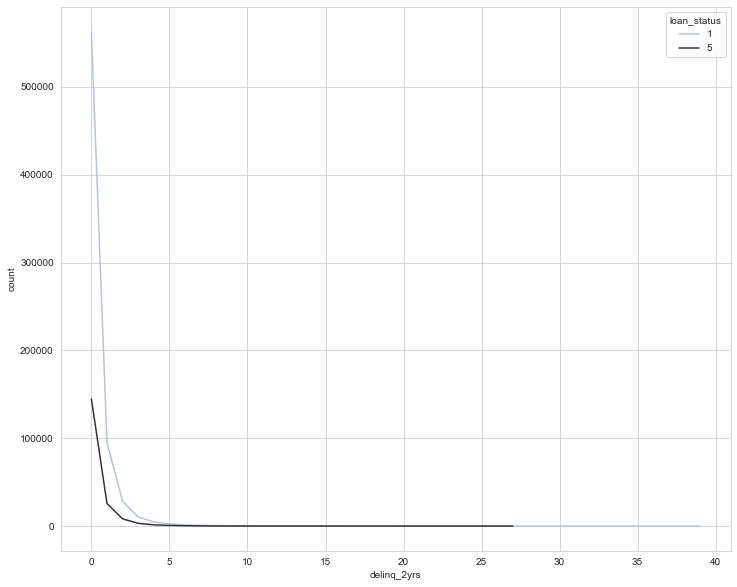

In [23]:
fig = plt.gcf()
fig.set_size_inches(12, 10)
sns.set_style('whitegrid')
sns.lineplot(data = delinq_1_5,
             x = 'delinq_2yrs',
             y = 'count',
            hue = 'loan_status',
            palette = 'PuBuGn_d');

In [24]:
# calculate spearman's correlation
corr, _ = spearmanr(train['delinq_2yrs'], train['loan_status'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.017


In [72]:
spearmanr(train['delinq_2yrs'], train['loan_status'])

SpearmanrResult(correlation=0.01651844229342595, pvalue=1.829124717013147e-55)

### State Address

In [ ]:
# Create count per loan status and state
loan_stat_state = train.value_counts(['addr_state', 'loan_status'])

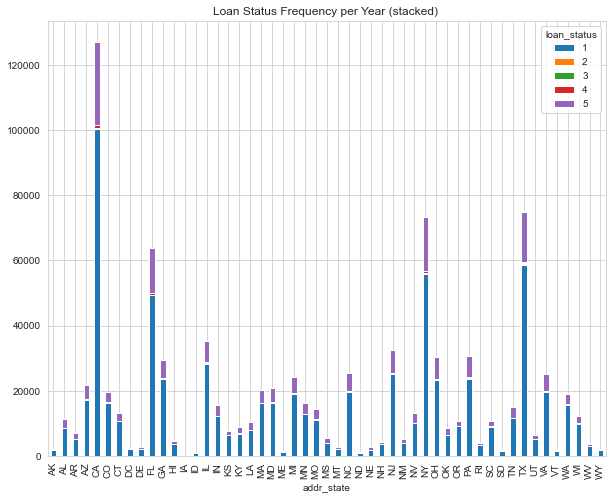

In [26]:
loan_stat_state.unstack().plot(kind='bar', stacked=True, figsize = (10, 8)  #plot a stacked grouped bar chart 
                         , title='Loan Status Frequency per Year (stacked) ');

We can see that some states make up most of the data in the distribution, such as California, New York, Texas and florida. While there are some like, Iowa, Indiana, North Dakota and Maine which are very underrepresented. 

In [49]:
# Prepare data for heatmap
state_df = create_df_table(loan_stat_state, 'state_df', 'addr_state') # Create dataframe with states and loan status
state_count = state_df.groupby(['addr_state'])[['count']].sum() # Groupby count of loans per state
state_count_dict = state_count['count'].to_dict() # Create dictionary for mapping
state_df['total'] = state_df['addr_state'].map(state_count_dict) # Map total loans per state
state_df['loan_stat_perc'] = round((state_df['count']/state_df['total']), 4) # Create percentage per state and loan status

In [64]:
# Create a heatmap of the states with loans which have been paid off or defaulted
def state_loan_status(ln_stat):
    state_tb = state_df[( state_df['loan_status'] == ln_stat)]
    fig = px.choropleth(data_frame = state_tb, locations='addr_state', locationmode="USA-states", color='loan_stat_perc', scope="usa")
    return fig.show()

In [65]:
state_loan_status(1)

In [66]:
state_loan_status(5)

### Income

Will be using the level of income to determine if there is relationship to the borrower's payability

In [67]:
train.total_inc_consol.describe()

count    9.018520e+05
mean     7.742234e+04
std      7.270044e+04
min      3.000000e+03
25%      4.600000e+04
50%      6.500000e+04
75%      9.200000e+04
max      9.573072e+06
Name: total_inc_consol, dtype: float64

In [68]:
income_loan_status = train[['total_inc_consol', 'loan_status']]

In [69]:
train.total_inc_consol.min()

3000.0

In [70]:
train.total_inc_consol.max()

9573072.0

In [71]:
income_loan_status_1 = delinq_t[(delinq_t['loan_status'] == 1)]
income_loan_status_5 = delinq_t[(delinq_t['loan_status'] == 5)]

In [ ]:
plt.hist()